In [1]:
import pandas as pd

In [2]:
data = [pd.read_csv('/content/emotion_1.csv'), pd.read_csv('/content/emotion_2.csv'), pd.read_csv('/content/emotion_3.csv'), pd.read_csv('/content/emotion_4.csv'), pd.read_csv('/content/emotion_5.csv'), pd.read_csv('/content/emotion_6.csv'), pd.read_csv('/content/emotion_7.csv'), pd.read_csv('/content/emotion_8.csv'), pd.read_csv('/content/emotion_9.csv'), pd.read_csv('/content/emotion_10.csv')]

In [3]:
import pandas
score = []
def isSelection(dframe):
  mean_emotions = {
    'happy': dframe['happy'].mean(),
    'neutral': dframe['neutral'].mean(),
    'surprise': dframe['surprise'].mean(),
    'sad': dframe['sad'].mean(),
    'fear': dframe['fear'].mean(),
    'angry': dframe['angry'].mean(),
    'disgust': dframe['disgust'].mean()
   }
  print("Mean values for emotions:")
  print(mean_emotions)

  weights = {
    'happy': 0.3,
    'neutral': 0.2,
    'surprise': 0.1,
    'sad': -0.1,
    'fear': -0.15,
    'angry': -0.2,
    'disgust': -0.25
  }

  final_score = (
       mean_emotions['happy'] * weights['happy'] +
       mean_emotions['neutral'] * weights['neutral'] +
       mean_emotions['surprise'] * weights['surprise'] +
       mean_emotions['sad'] * weights['sad'] +
       mean_emotions['fear'] * weights['fear'] +
       mean_emotions['angry'] * weights['angry'] +
       mean_emotions['disgust'] * weights['disgust']
  )

  score.append(final_score)
  print(f"\nFinal Score based on the mean values: {final_score}")

  def decide_selection(score):
    if score >= 10:
        return 'Select'
    elif 5 <= score < 10:
        return 'Consider'
    else:
        return 'Reject'

  selection_decision = decide_selection(final_score)

  print(f"\nSelection Decision: {selection_decision}")


In [4]:
final_score = []
for i in data:
  isSelection(i)

Mean values for emotions:
{'happy': 5.865318273331954, 'neutral': 38.363647817540226, 'surprise': 8.744968962995747, 'sad': 13.575324259155172, 'fear': 18.382796868965517, 'angry': 14.451058919540229, 'disgust': 0.6168964929445279}

Final Score based on the mean values: 3.1474340784026844

Selection Decision: Reject
Mean values for emotions:
{'happy': 35.063288345977014, 'neutral': 26.576600131137937, 'surprise': 2.2673299483980696, 'sad': 18.55839076, 'fear': 6.747535936875746, 'angry': 10.395040800995405, 'disgust': 0.3918152980098833}

Final Score based on the mean values: 11.016108073627583

Selection Decision: Select
Mean values for emotions:
{'happy': 21.428419871000003, 'neutral': 37.840726408, 'surprise': 7.268728268648, 'sad': 10.2958982381, 'fear': 21.6332982558, 'angry': 1.531082460721, 'disgust': 0.0018469834791581918}

Final Score based on the mean values: 10.142281269570812

Selection Decision: Select
Mean values for emotions:
{'happy': 0.5726504152302021, 'neutral': 92.6

In [5]:
score

[3.1474340784026844,
 11.016108073627583,
 10.142281269570812,
 17.994903430215825,
 17.237422413502724,
 22.090877452474963,
 -3.343266278737367,
 12.005371252165725,
 9.70055259708423,
 -4.023356289492993]

In [6]:
emotion_data = [{str(i+1):score[i]} for i in range(len(score))]

In [7]:
emotion_data

[{'1': 3.1474340784026844},
 {'2': 11.016108073627583},
 {'3': 10.142281269570812},
 {'4': 17.994903430215825},
 {'5': 17.237422413502724},
 {'6': 22.090877452474963},
 {'7': -3.343266278737367},
 {'8': 12.005371252165725},
 {'9': 9.70055259708423},
 {'10': -4.023356289492993}]

In [8]:
df = pd.DataFrame([(k, v) for d in emotion_data for k, v in d.items()], columns=['Candidate', 'Emotion_Score'])

In [9]:
dframe = pd.DataFrame(df)

In [10]:
scores = dframe.to_csv('scores_emotion.csv')

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

def candidateSelection(df, idx):
    weights = {
        'happy': 0.3,
        'neutral': 0.2,
        'surprise': 0.1,
        'sad': -0.1,
        'fear': -0.15,
        'angry': -0.2,
        'disgust': -0.25
    }

    mean_emotions = {
        'happy': df['happy'].mean(),
        'neutral': df['neutral'].mean(),
        'surprise': df['surprise'].mean(),
        'sad': df['sad'].mean(),
        'fear': df['fear'].mean(),
        'angry': df['angry'].mean(),
        'disgust': df['disgust'].mean()
    }

    final_score = (
        mean_emotions['happy'] * weights['happy'] +
        mean_emotions['neutral'] * weights['neutral'] +
        mean_emotions['surprise'] * weights['surprise'] +
        mean_emotions['sad'] * weights['sad'] +
        mean_emotions['fear'] * weights['fear'] +
        mean_emotions['angry'] * weights['angry'] +
        mean_emotions['disgust'] * weights['disgust']
    )

    def decide_selection(score):
        if score >= 10:
            return 'Select'
        elif 5 <= score < 10:
            return 'Consider'
        else:
            return 'Reject'

    selection_decision = decide_selection(final_score)

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

    ax1 = plt.subplot(gs[0])

    emotions = list(mean_emotions.keys())
    mean_values = list(mean_emotions.values())
    colors = ['#4CAF50', '#2196F3', '#FFC107', '#F44336', '#9C27B0', '#FF5722', '#607D8B']

    bars = ax1.bar(emotions, mean_values, color=colors)

    ax1.set_xlabel('Emotions', fontsize=14)
    ax1.set_ylabel('Mean Scores', fontsize=14)
    ax1.set_title(f'Mean Emotion Scores for Candidate {idx+1}', fontsize=16)

    for bar, value in zip(bars, mean_values):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}',
                 ha='center', va='bottom', fontsize=12)

    ax2 = plt.subplot(gs[1])
    ax2.axis('off')

    text_str = (f"Final Score: {final_score:.2f}\n"
                f"Selection Decision: {selection_decision}")

    ax2.text(0.5, 0.5, text_str, fontsize=18, ha='center', va='center',
             bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='green', boxstyle='round,pad=1'))

    plt.tight_layout()
    plt.show()



In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def plotEmotionPieChart(df, idx):
    mean_emotions = {
        'happy': df['happy'].mean(),
        'neutral': df['neutral'].mean(),
        'surprise': df['surprise'].mean(),
        'sad': df['sad'].mean(),
        'fear': df['fear'].mean(),
        'angry': df['angry'].mean(),
        'disgust': df['disgust'].mean()
    }

    emotions = list(mean_emotions.keys())
    mean_values = list(mean_emotions.values())
    colors = ['#4CAF50', '#2196F3', '#FFC107', '#F44336', '#9C27B0', '#FF5722', '#607D8B']

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(mean_values, labels=emotions, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title(f'Emotion Distribution for Candidate {idx+1}', fontsize=16)

    plt.tight_layout()
    plt.show()



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

def plotRadarChart(mean_emotions, candidate_idx, selection_decision):
    categories = list(mean_emotions.keys())
    values = list(mean_emotions.values())

    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    values += values[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot data
    ax.fill(angles, values, color='#2196F3', alpha=0.4)
    ax.plot(angles, values, color='#2196F3', linewidth=2)

    # Add labels to the chart
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Y-axis labels
    ax.set_yticklabels([])  # You can enable this if you need the radial values

    # Title with selection decision
    ax.set_title(f'Candidate {candidate_idx+1} - {selection_decision}', size=16, color='darkblue', weight='bold')

    plt.tight_layout()
    plt.show()

# Example data and logic for selection decision
def candidateSelectionRadar(df, idx):
    weights = {
        'happy': 0.3,
        'neutral': 0.2,
        'surprise': 0.1,
        'sad': -0.1,
        'fear': -0.15,
        'angry': -0.2,
        'disgust': -0.25
    }

    mean_emotions = {
        'happy': df['happy'].mean(),
        'neutral': df['neutral'].mean(),
        'surprise': df['surprise'].mean(),
        'sad': df['sad'].mean(),
        'fear': df['fear'].mean(),
        'angry': df['angry'].mean(),
        'disgust': df['disgust'].mean()
    }

    final_score = (
        mean_emotions['happy'] * weights['happy'] +
        mean_emotions['neutral'] * weights['neutral'] +
        mean_emotions['surprise'] * weights['surprise'] +
        mean_emotions['sad'] * weights['sad'] +
        mean_emotions['fear'] * weights['fear'] +
        mean_emotions['angry'] * weights['angry'] +
        mean_emotions['disgust'] * weights['disgust']
    )

    # Selection decision logic
    def decide_selection(score):
        if score >= 10:
            return 'Select'
        elif 5 <= score < 10:
            return 'Consider'
        else:
            return 'Reject'
    selection_decision = decide_selection(final_score)
    plotRadarChart(mean_emotions, idx, selection_decision)






Candidate1(emotion analysis)

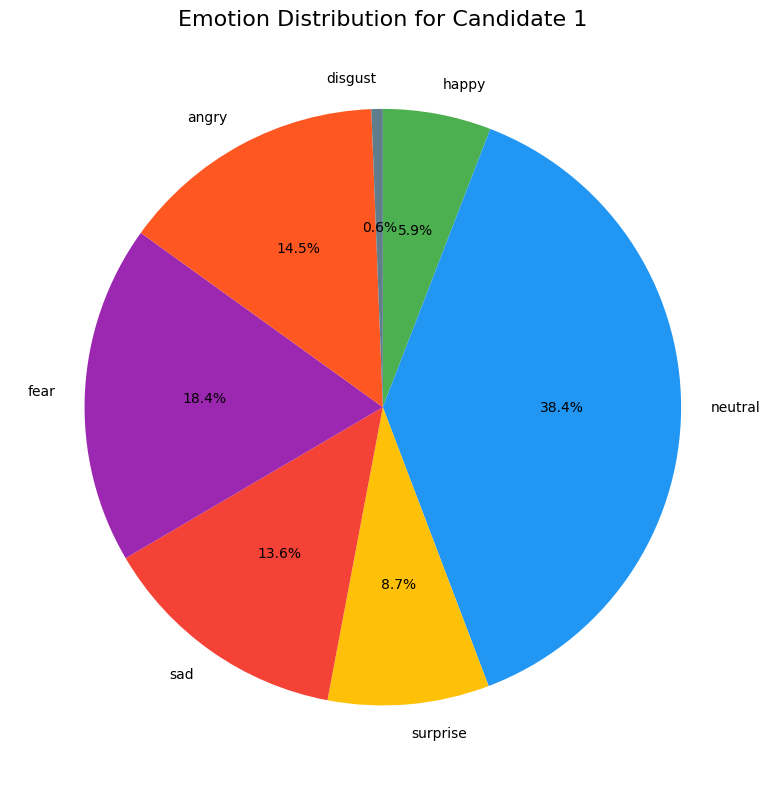

In [14]:
plotEmotionPieChart(data[0], 0)

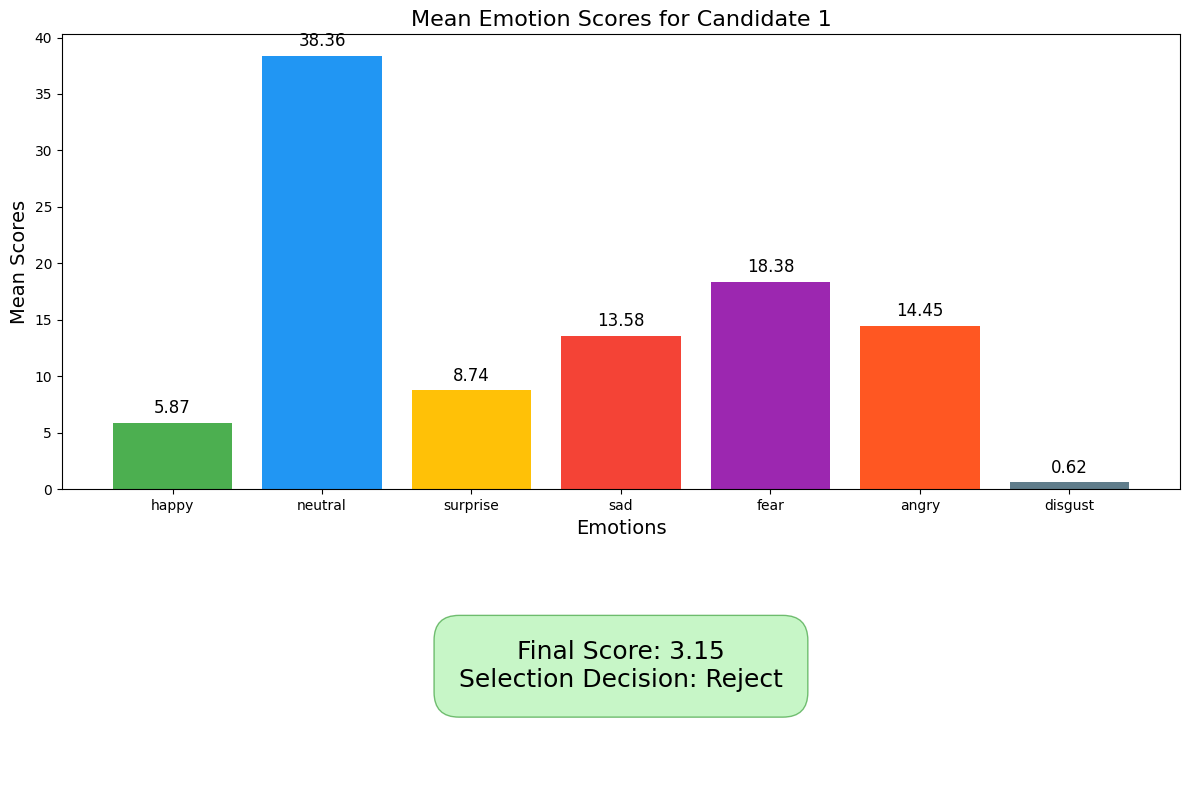

In [15]:
candidateSelection(data[0], 0)

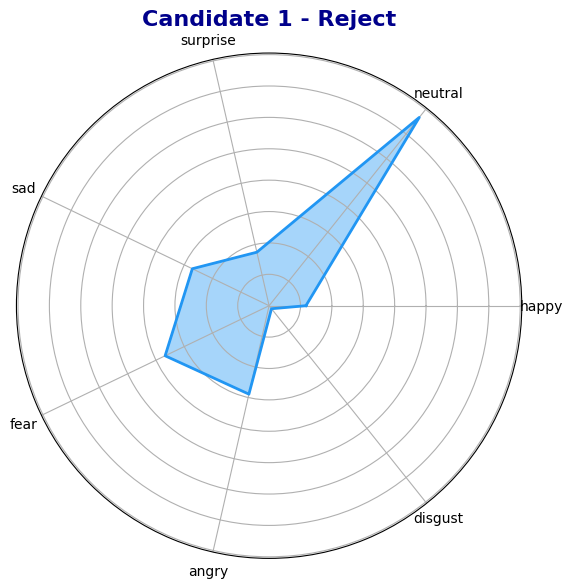

In [16]:
candidateSelectionRadar(data[0], 0)

Candidate 2(emotion analysis)

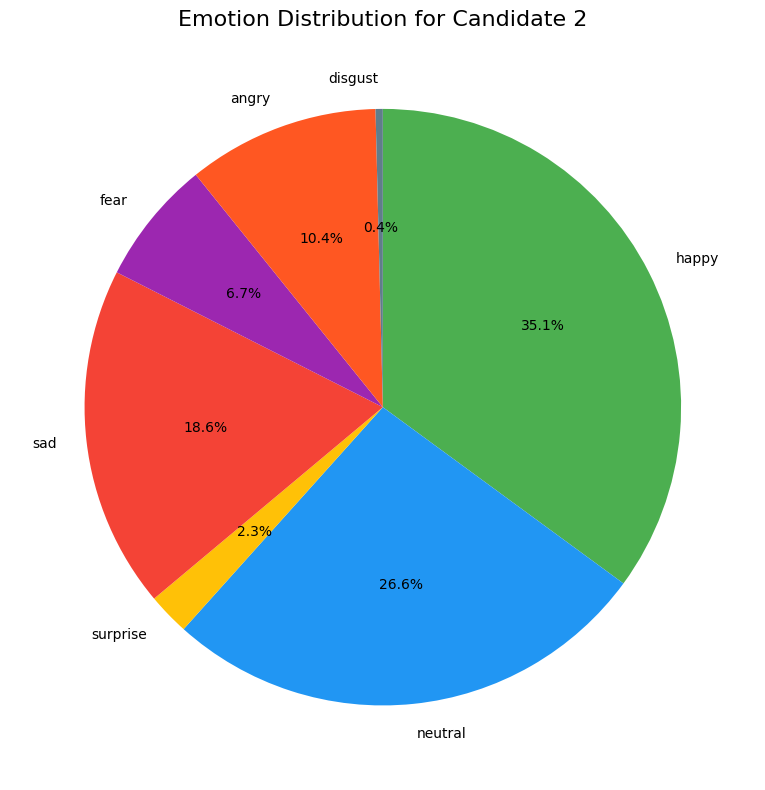

In [17]:
plotEmotionPieChart(data[1], 1)

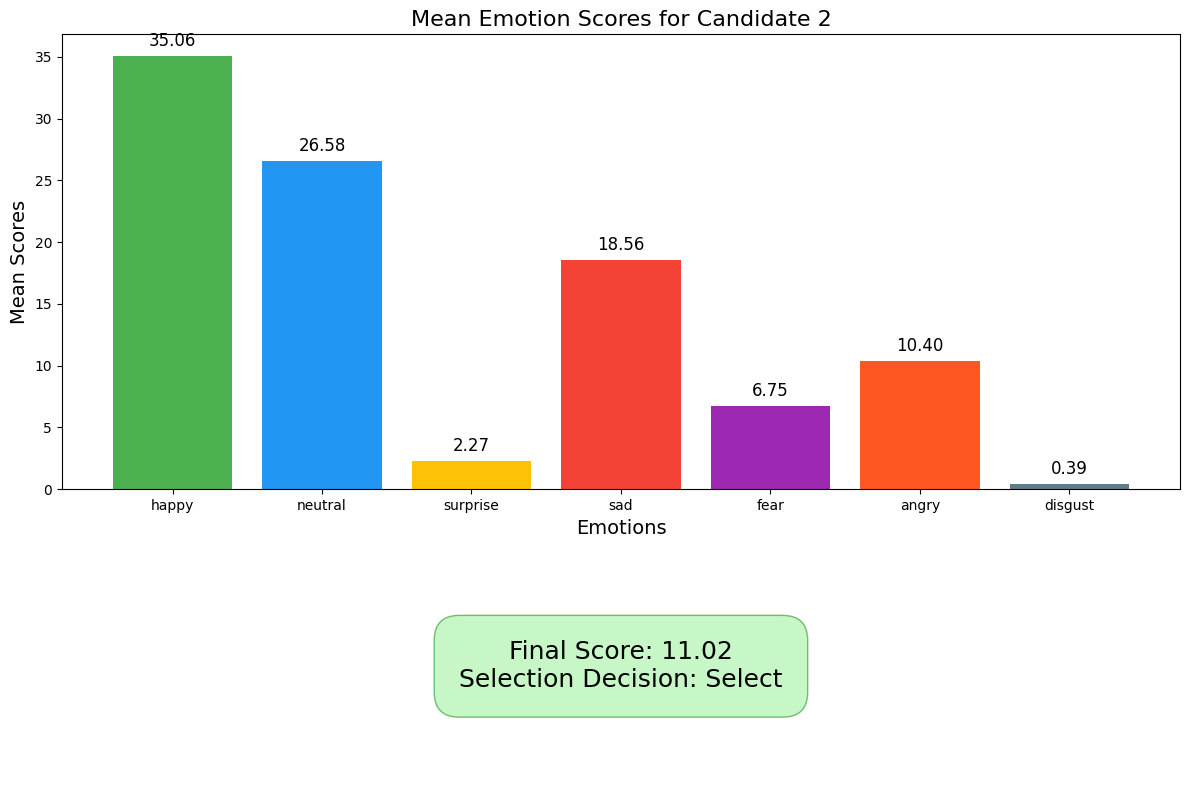

In [18]:
candidateSelection(data[1], 1)

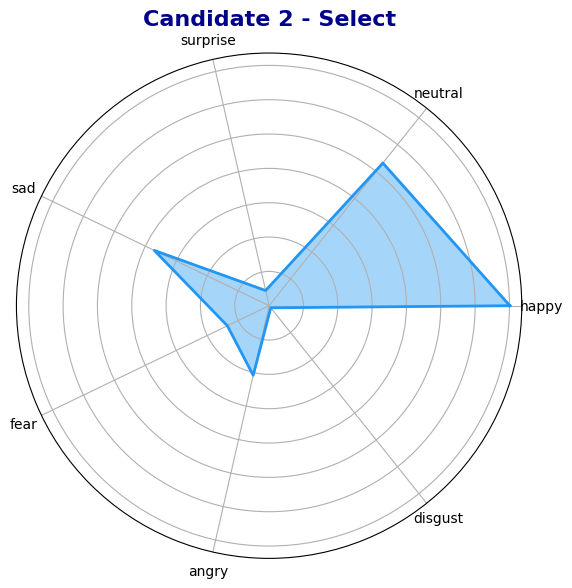

In [19]:
candidateSelectionRadar(data[1], 1)

Candidate 3(emotion analysis)

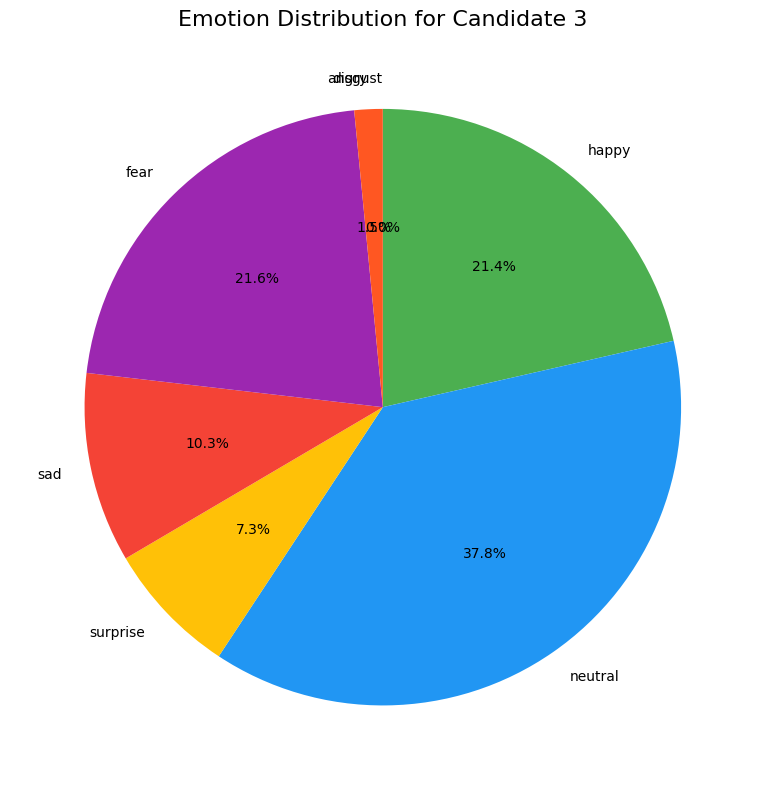

In [20]:
plotEmotionPieChart(data[2], 2)

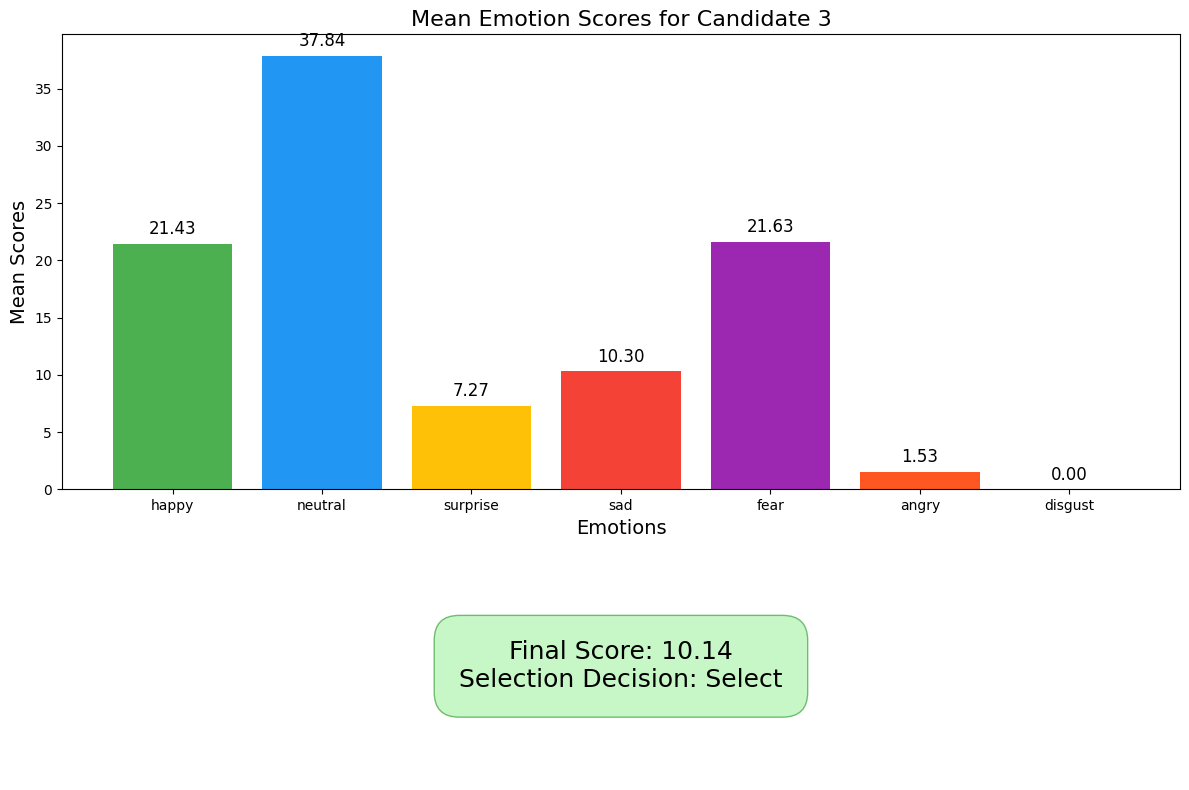

In [21]:
candidateSelection(data[2], 2)

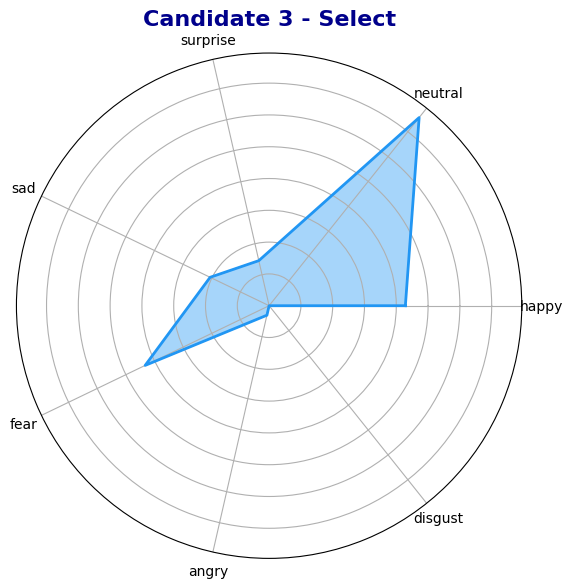

In [22]:
candidateSelectionRadar(data[2], 2)

candidate 4(emotion analysis)

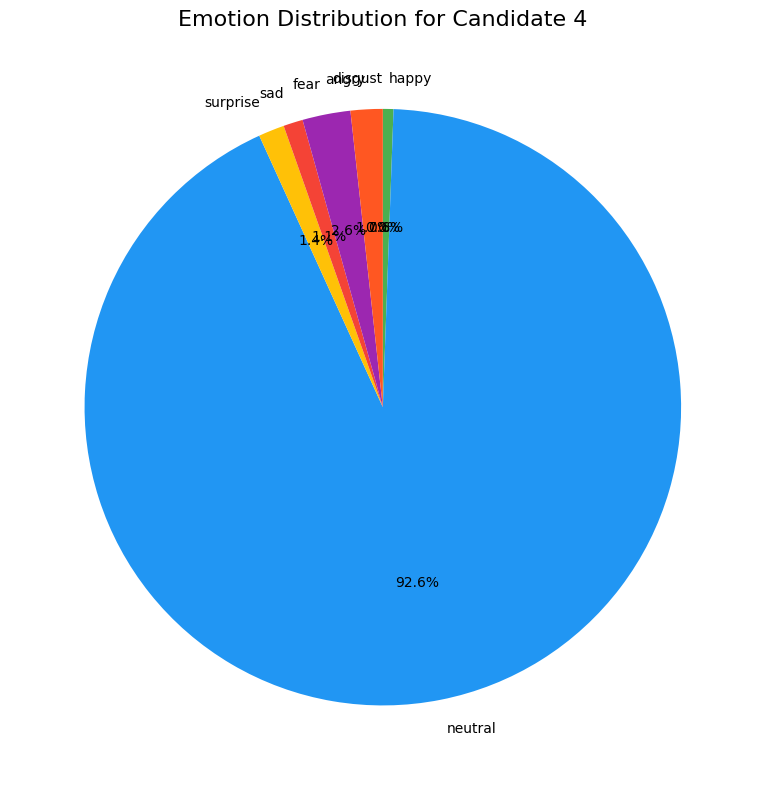

In [23]:
plotEmotionPieChart(data[3], 3)

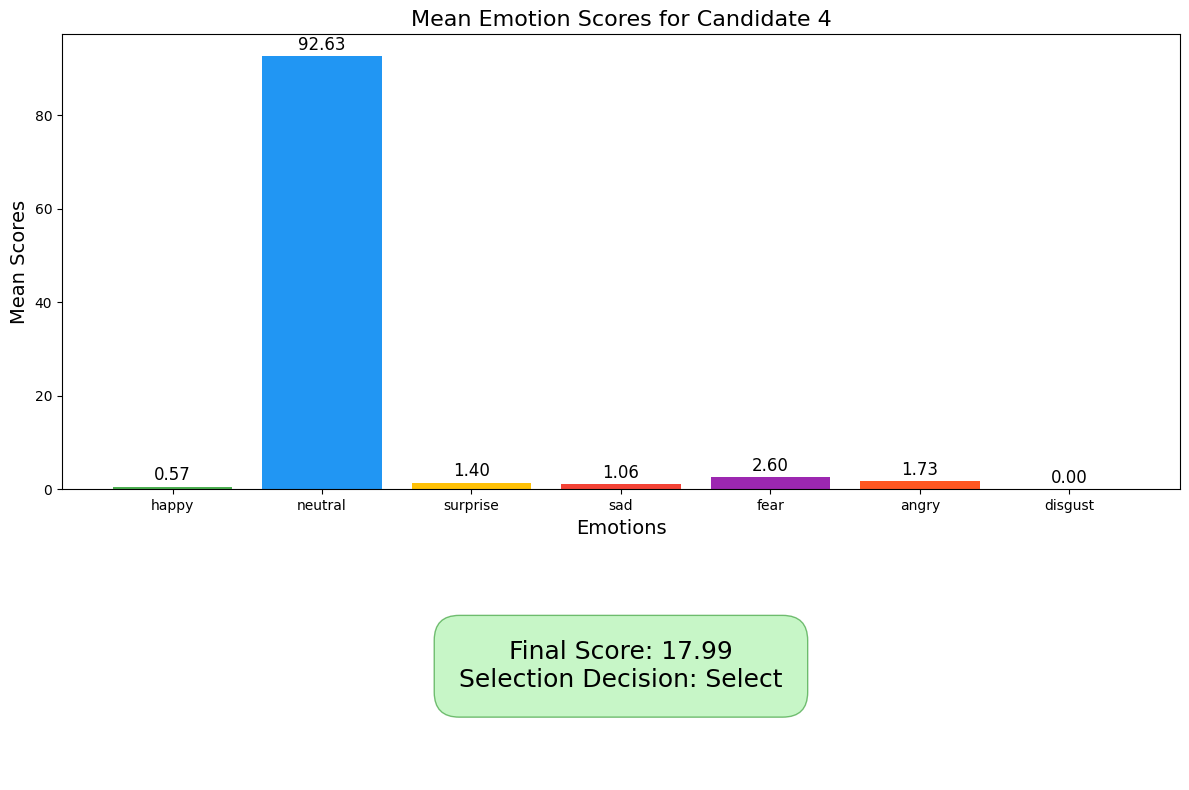

In [24]:
candidateSelection(data[3], 3)

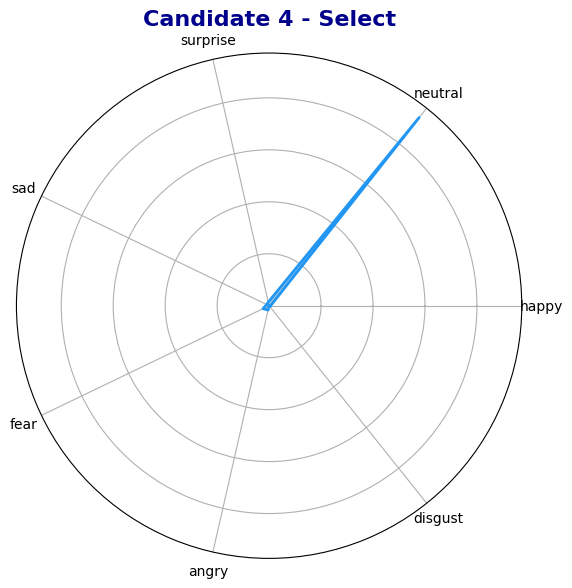

In [25]:
candidateSelectionRadar(data[3], 3)

Candidate 5(emotion analysis)

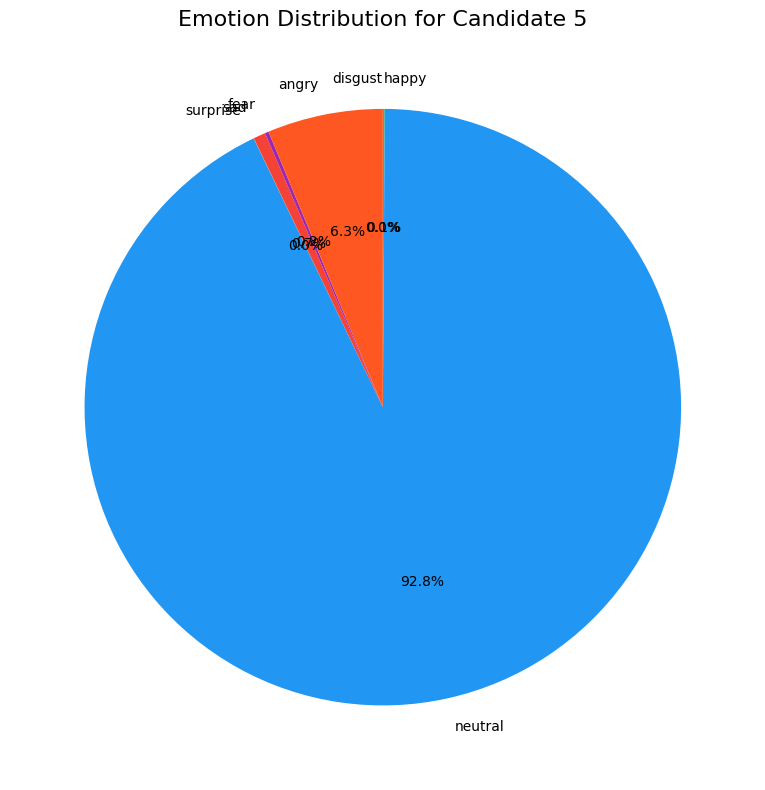

In [26]:
plotEmotionPieChart(data[4], 4)

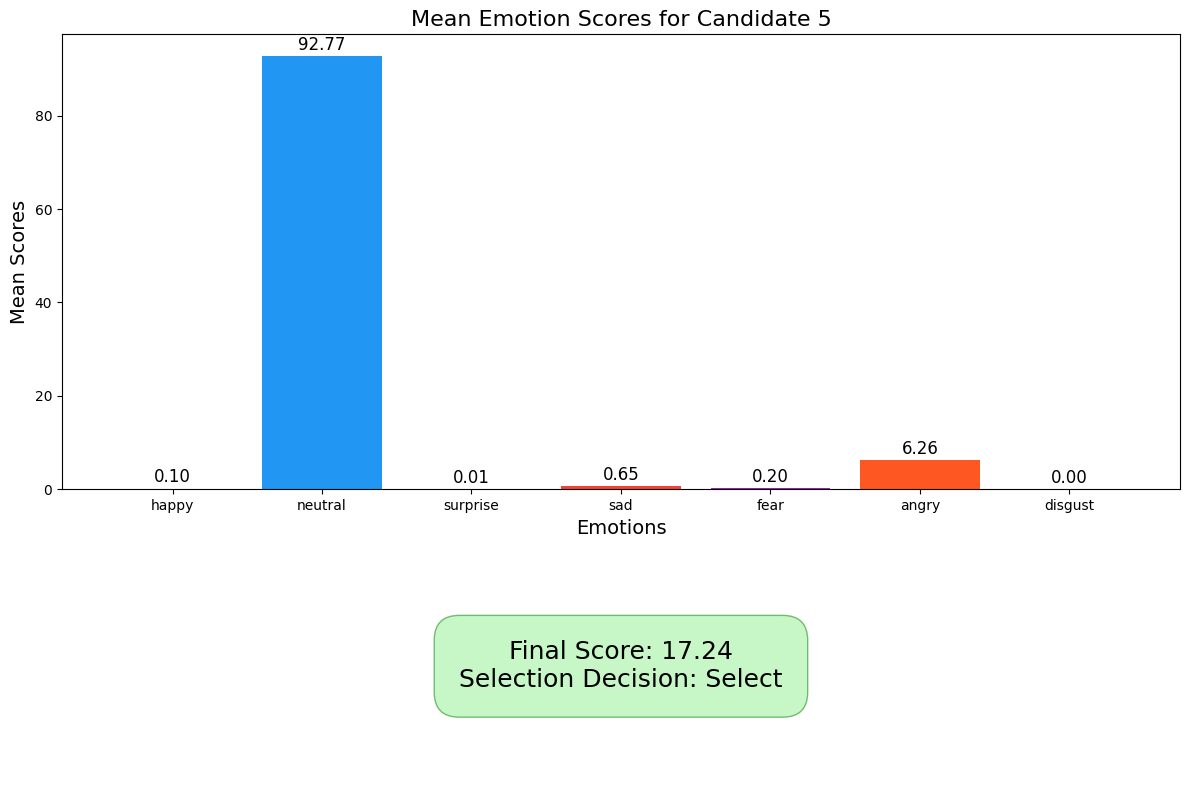

In [27]:
candidateSelection(data[4],4)

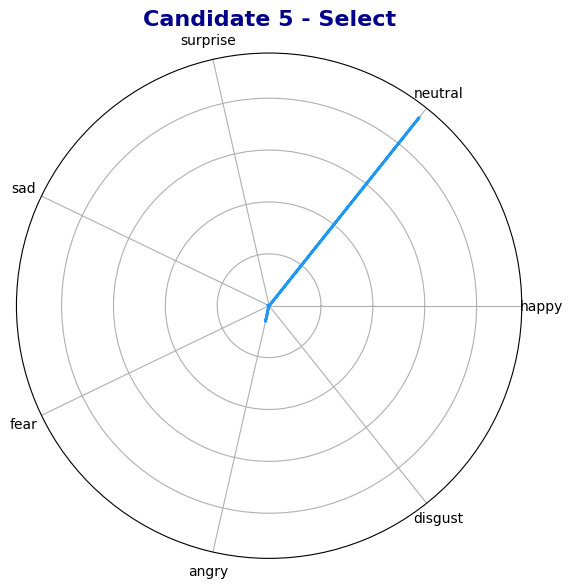

In [28]:
candidateSelectionRadar(data[4], 4)

Candidate 6(emotion analysis)

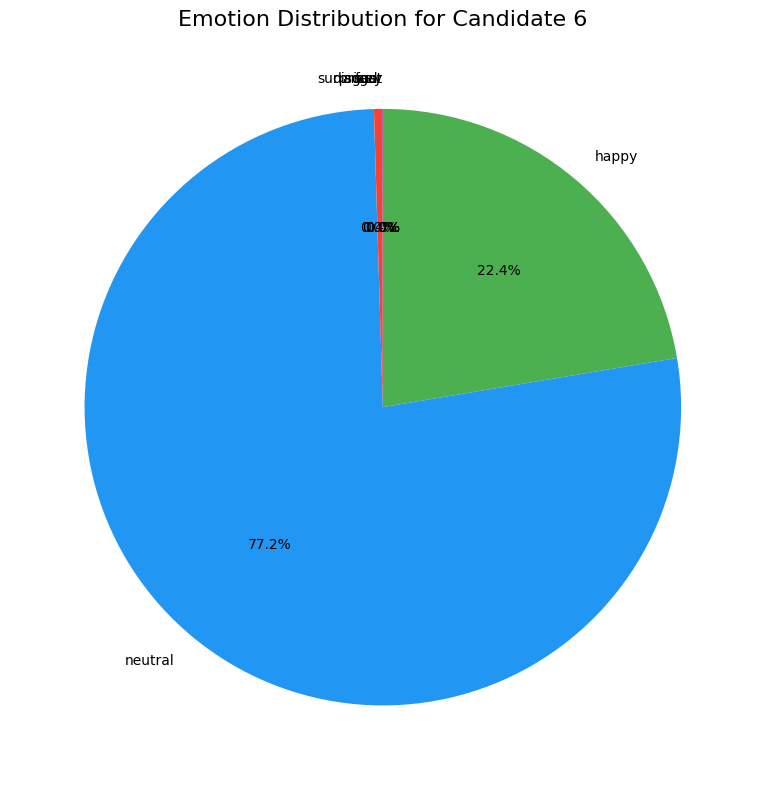

In [29]:
plotEmotionPieChart(data[5], 5)

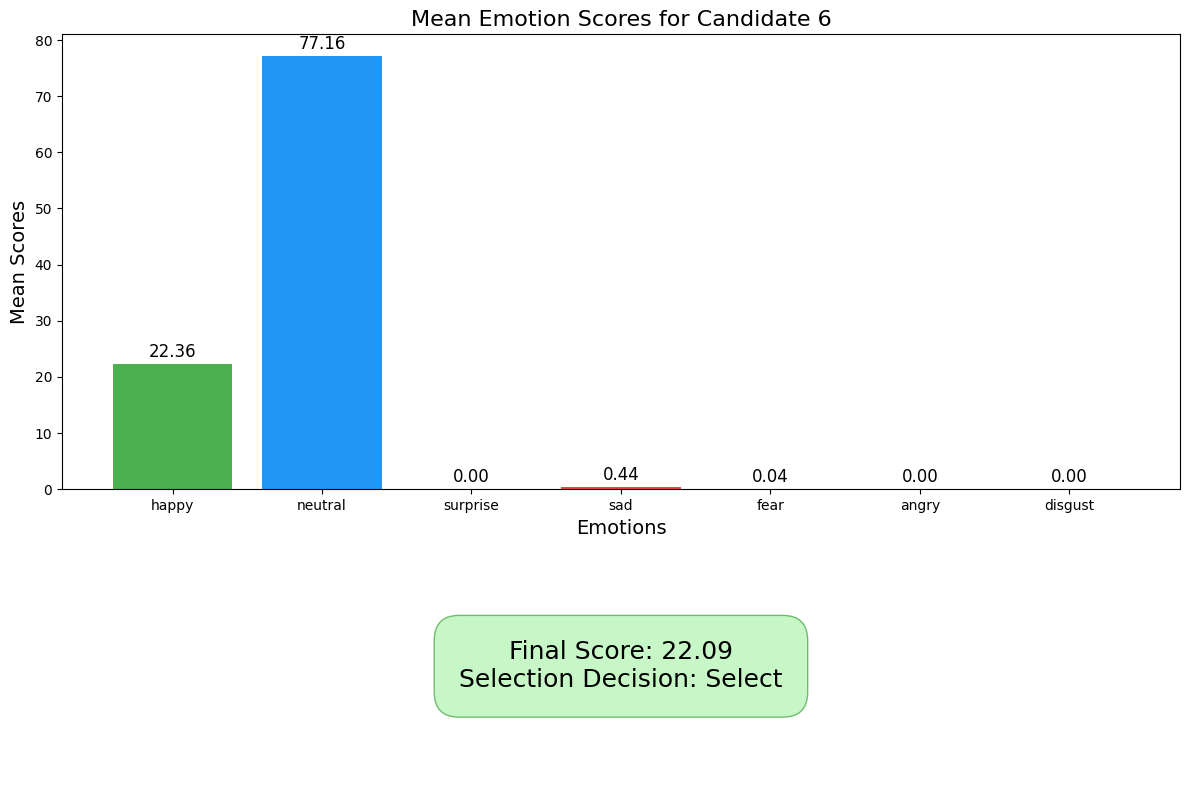

In [30]:
candidateSelection(data[5], 5)

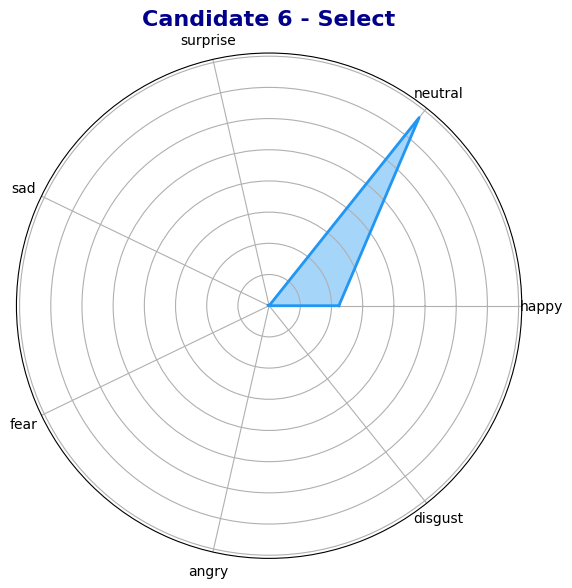

In [31]:
candidateSelectionRadar(data[5], 5)

Candidate 7(emotion analysis)

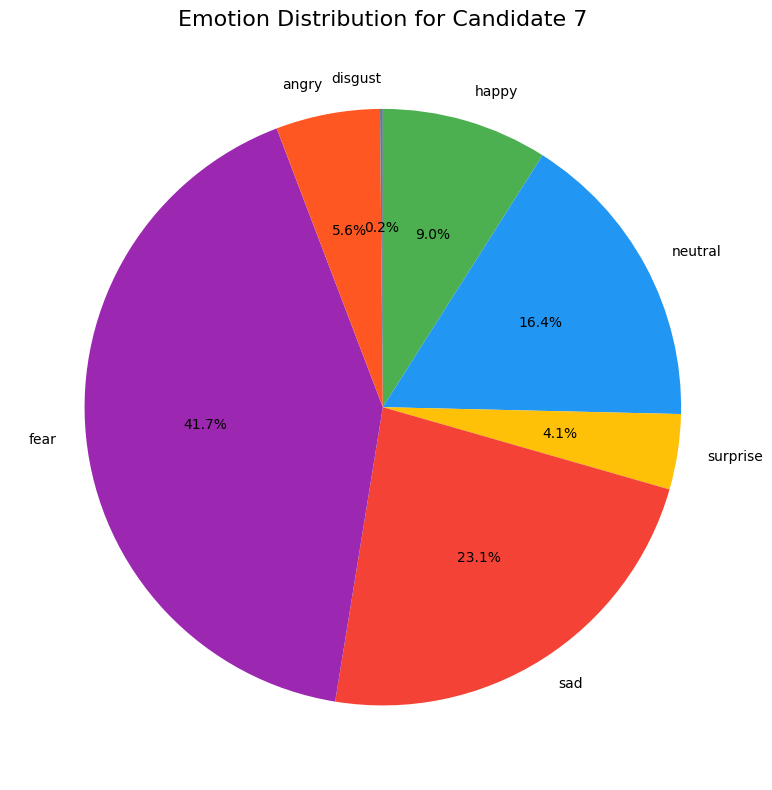

In [32]:
plotEmotionPieChart(data[6], 6)

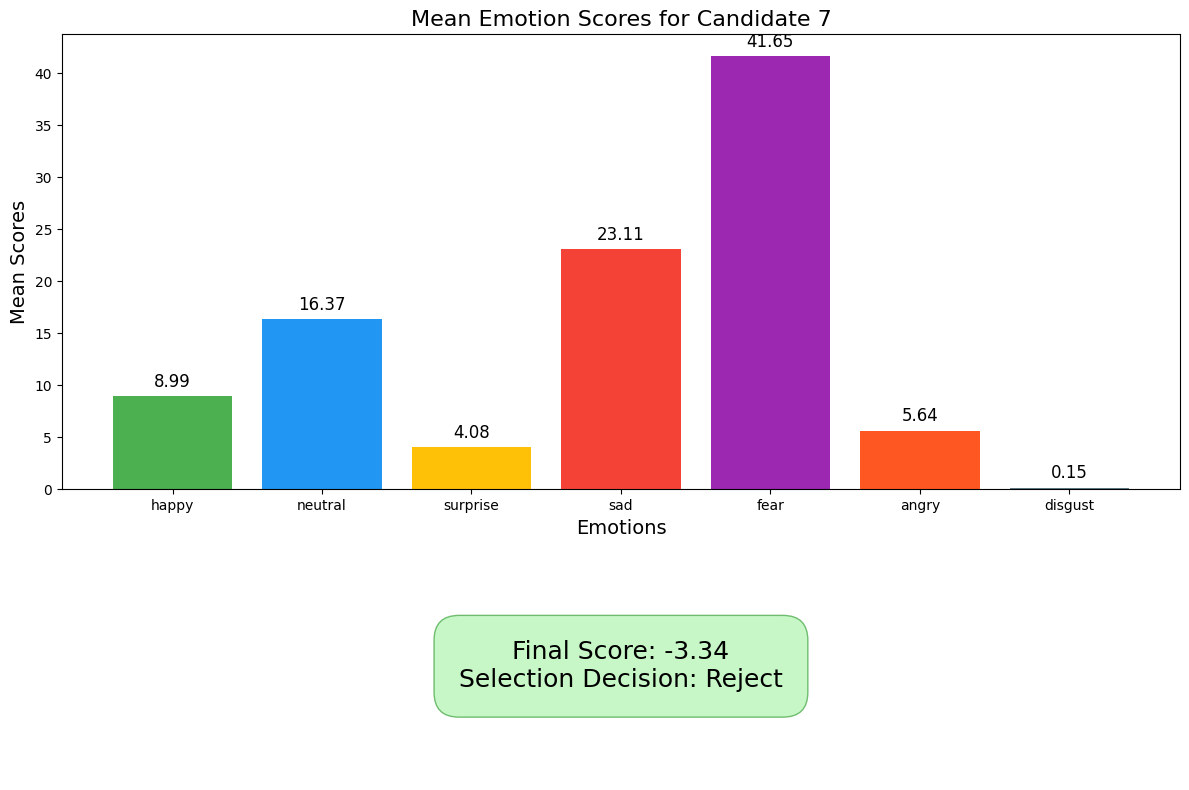

In [33]:
candidateSelection(data[6], 6)

Candidate 8(emotion analysis)

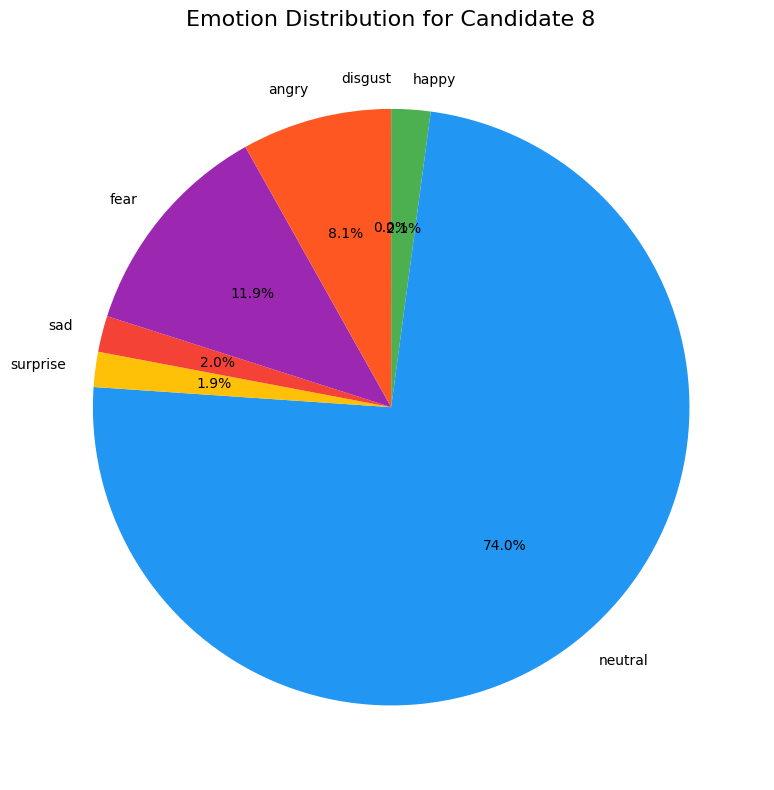

In [34]:
plotEmotionPieChart(data[7], 7)

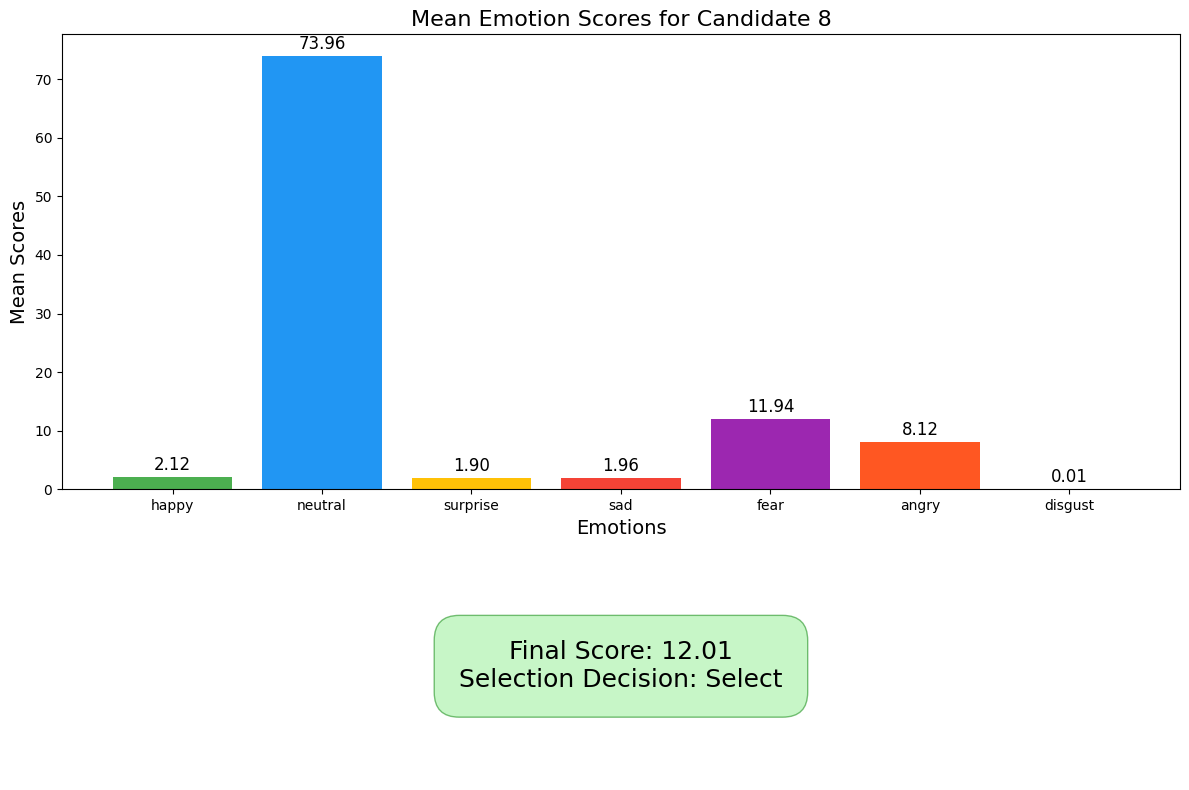

In [35]:
candidateSelection(data[7], 7)

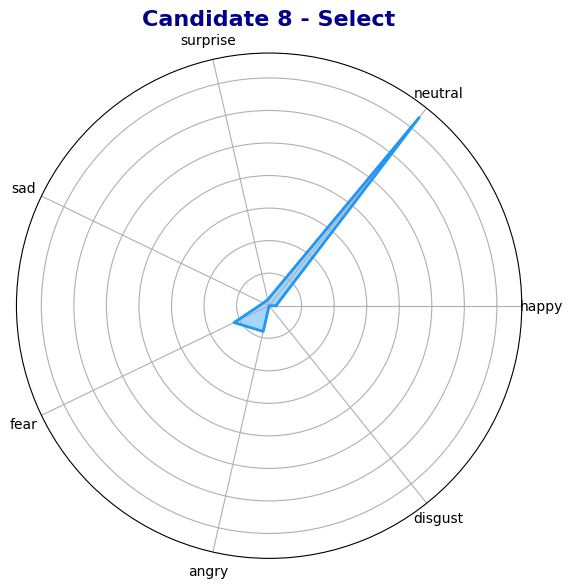

In [36]:
candidateSelectionRadar(data[7], 7)

Candidate 9(emotion analysis)

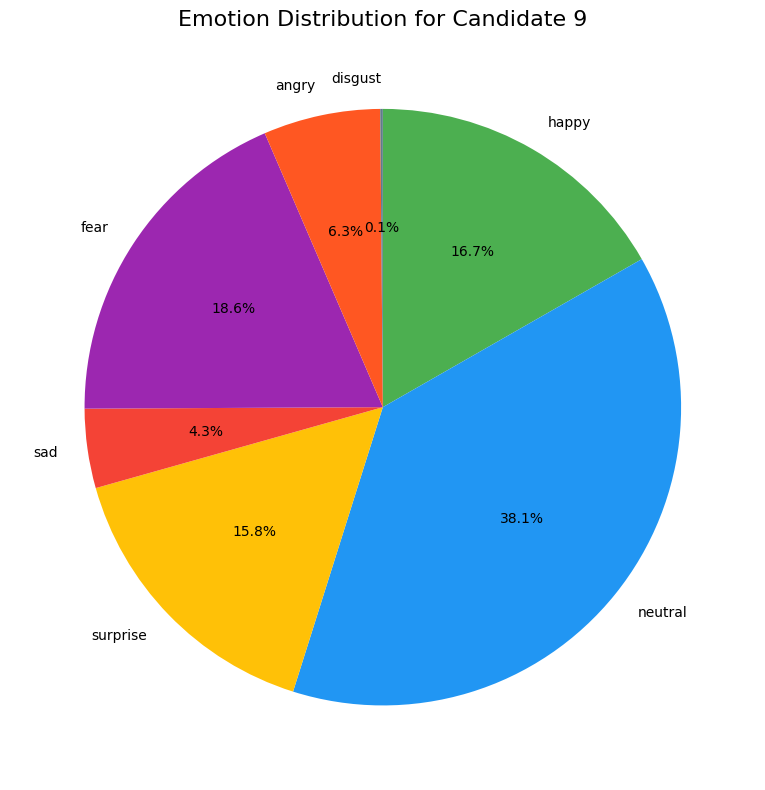

In [37]:
plotEmotionPieChart(data[8], 8)

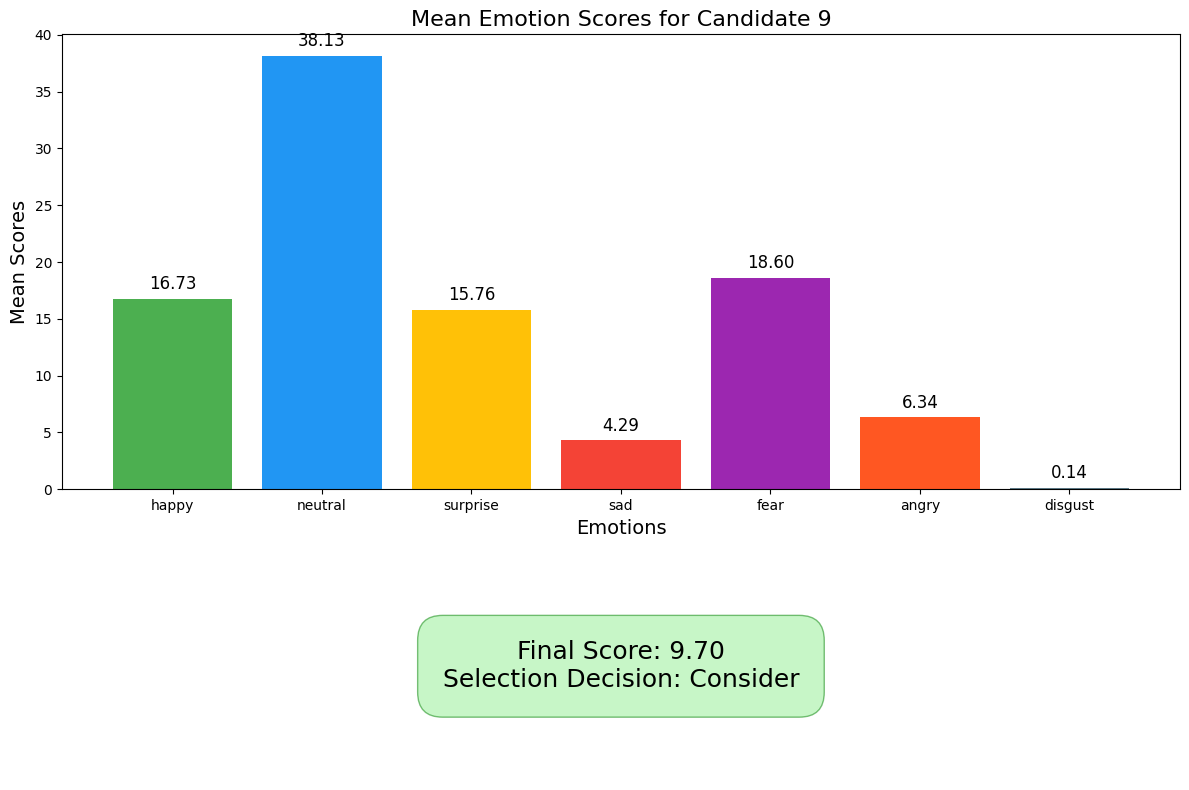

In [38]:
candidateSelection(data[8], 8)

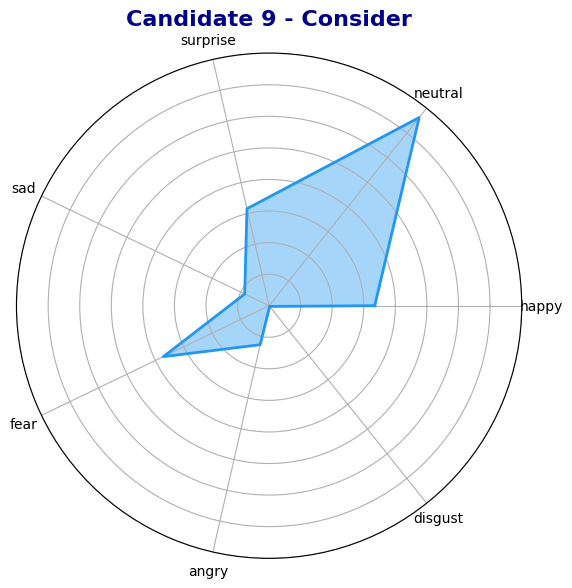

In [39]:
candidateSelectionRadar(data[8], 8)

Candidate 10(emotion analysis)

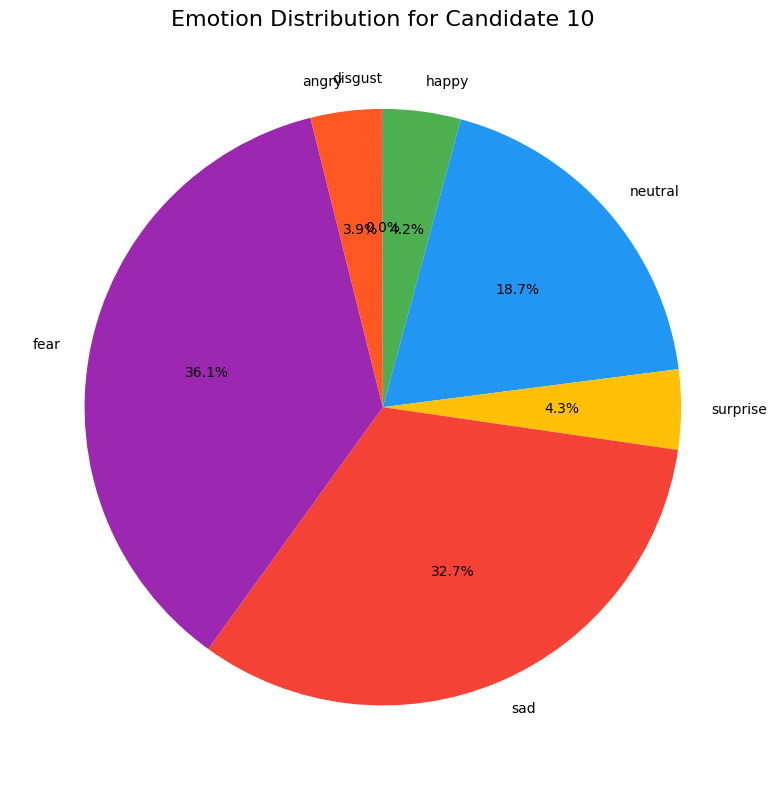

In [40]:
plotEmotionPieChart(data[9], 9)

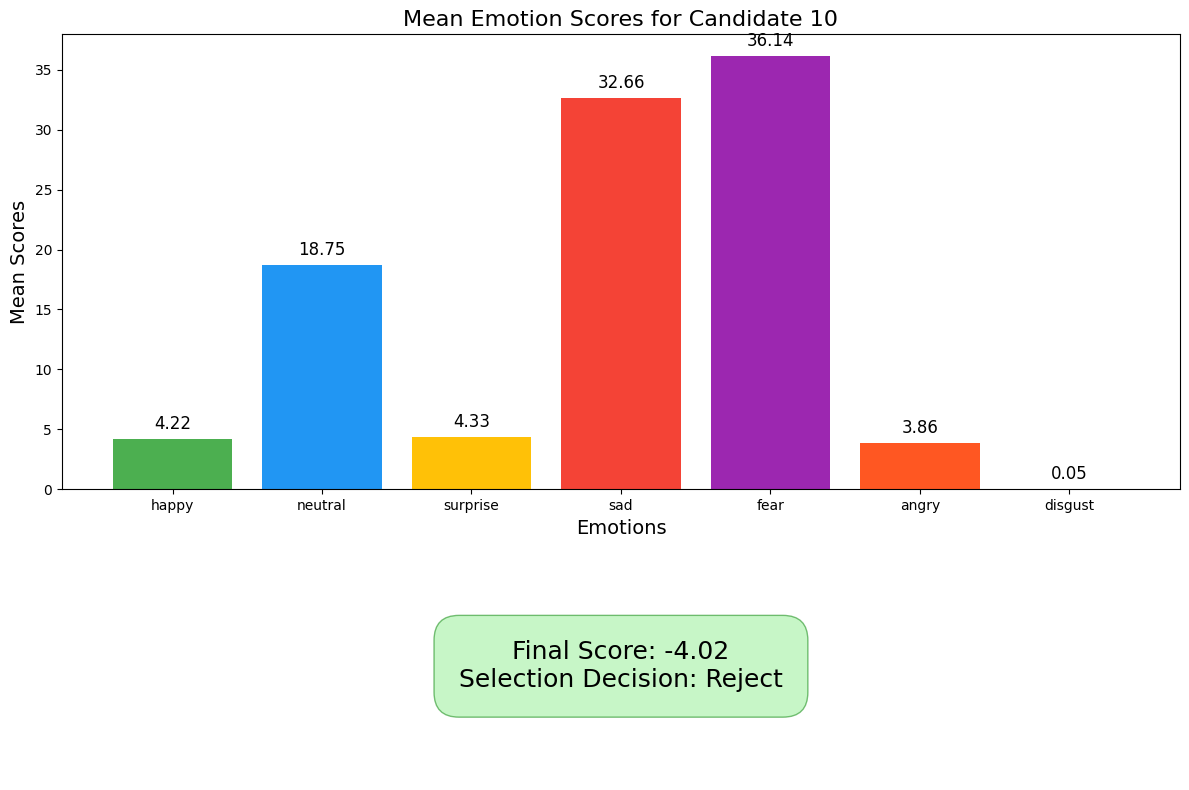

In [41]:
candidateSelection(data[9], 9)

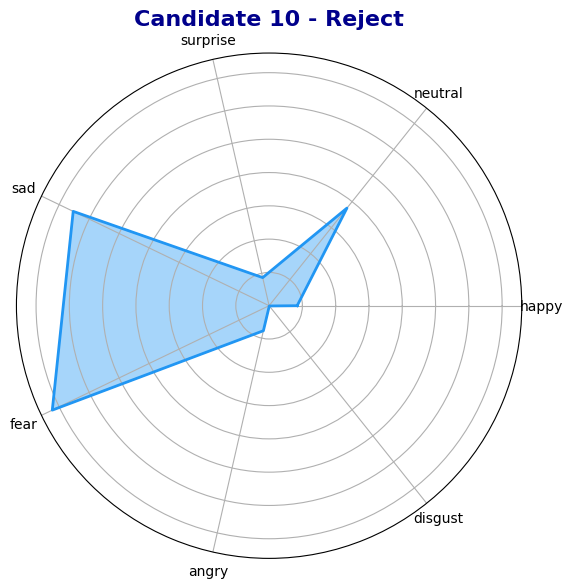

In [42]:
candidateSelectionRadar(data[9], 9)

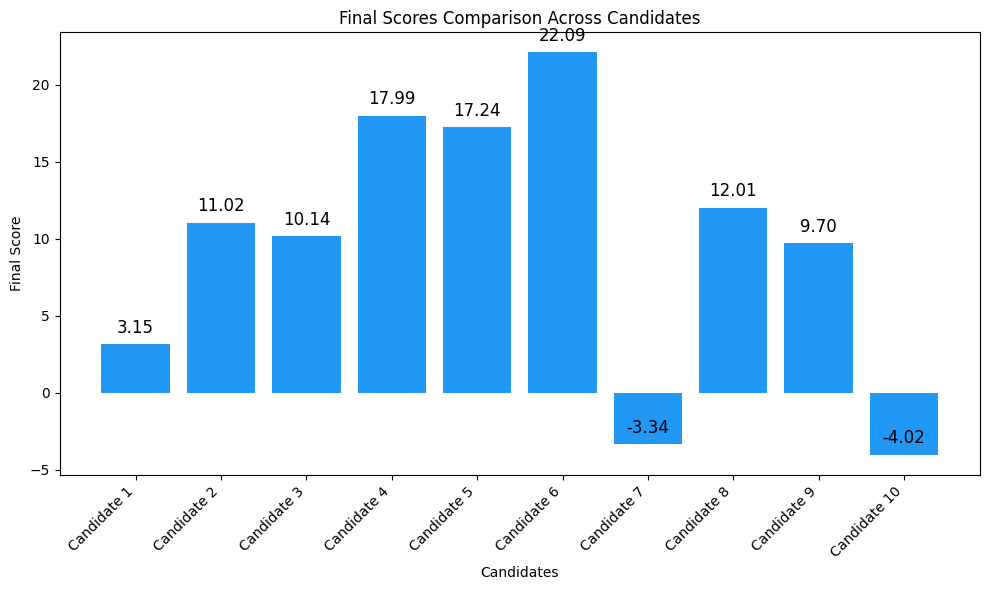

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plotFinalScores(data):
    num_candidates = len(data)
    final_scores = []
    candidates = []

    weights = {
        'happy': 0.3,
        'neutral': 0.2,
        'surprise': 0.1,
        'sad': -0.1,
        'fear': -0.15,
        'angry': -0.2,
        'disgust': -0.25
    }

    def calculate_final_score(df):
        mean_emotions = {
            'happy': df['happy'].mean(),
            'neutral': df['neutral'].mean(),
            'surprise': df['surprise'].mean(),
            'sad': df['sad'].mean(),
            'fear': df['fear'].mean(),
            'angry': df['angry'].mean(),
            'disgust': df['disgust'].mean()
        }
        return (
            mean_emotions['happy'] * weights['happy'] +
            mean_emotions['neutral'] * weights['neutral'] +
            mean_emotions['surprise'] * weights['surprise'] +
            mean_emotions['sad'] * weights['sad'] +
            mean_emotions['fear'] * weights['fear'] +
            mean_emotions['angry'] * weights['angry'] +
            mean_emotions['disgust'] * weights['disgust']
        )

    for idx, df in enumerate(data):
        final_score = calculate_final_score(df)
        final_scores.append(final_score)
        candidates.append(f'Candidate {idx+1}')

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(candidates, final_scores, color='#2196F3')

    ax.set_xlabel('Candidates')
    ax.set_ylabel('Final Score')
    ax.set_title('Final Scores Comparison Across Candidates')

    for bar, score in zip(bars, final_scores):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{score:.2f}',
                ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plotFinalScores(data)


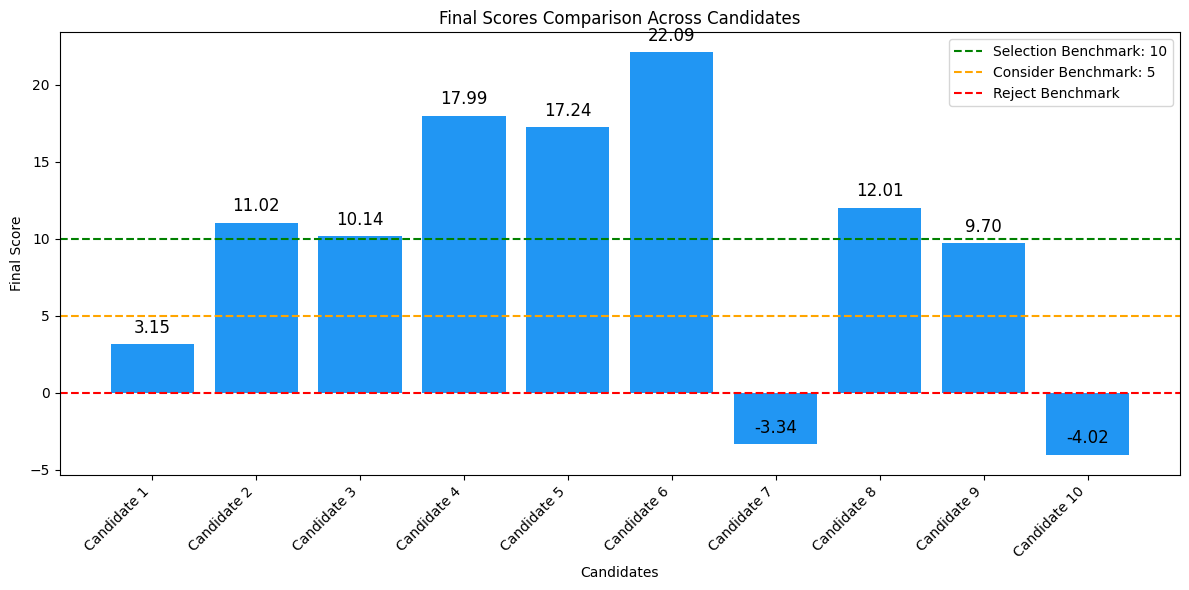

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

def plotFinalScores(data, selection_benchmark=10, consider_benchmark=5):
    num_candidates = len(data)
    final_scores = []
    candidates = []

    weights = {
        'happy': 0.3,
        'neutral': 0.2,
        'surprise': 0.1,
        'sad': -0.1,
        'fear': -0.15,
        'angry': -0.2,
        'disgust': -0.25
    }

    def calculate_final_score(df):
        mean_emotions = {
            'happy': df['happy'].mean(),
            'neutral': df['neutral'].mean(),
            'surprise': df['surprise'].mean(),
            'sad': df['sad'].mean(),
            'fear': df['fear'].mean(),
            'angry': df['angry'].mean(),
            'disgust': df['disgust'].mean()
        }
        return (
            mean_emotions['happy'] * weights['happy'] +
            mean_emotions['neutral'] * weights['neutral'] +
            mean_emotions['surprise'] * weights['surprise'] +
            mean_emotions['sad'] * weights['sad'] +
            mean_emotions['fear'] * weights['fear'] +
            mean_emotions['angry'] * weights['angry'] +
            mean_emotions['disgust'] * weights['disgust']
        )

    for idx, df in enumerate(data):
        final_score = calculate_final_score(df)
        final_scores.append(final_score)
        candidates.append(f'Candidate {idx+1}')

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(candidates, final_scores, color='#2196F3')

    ax.axhline(y=selection_benchmark, color='green', linestyle='--', linewidth=1.5, label=f'Selection Benchmark: {selection_benchmark}')
    ax.axhline(y=consider_benchmark, color='orange', linestyle='--', linewidth=1.5, label=f'Consider Benchmark: {consider_benchmark}')
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Reject Benchmark')

    ax.set_xlabel('Candidates')
    ax.set_ylabel('Final Score')
    ax.set_title('Final Scores Comparison Across Candidates')
    ax.legend()

    for bar, score in zip(bars, final_scores):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{score:.2f}',
                ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



plotFinalScores(data)
